In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# README.md dosyası
https://github.com/muhammedkoca17/-ikinci-El-Araba-Fiyat-Tahmini-Gozetimli-ve-Gozetimsiz-Ogrenme/blob/main/README.md

#    **Veri Seti Kaynağı**

Veri seti, internet üzerindeki dış kaynaklardan toplanan, geçmişe ait araba müzayedesi satış fiyatlarını içermektedir. Veri seti 2015 yılında toplanmıştır ve güncellenmeyecektir.

#    **Kütüphane Hakkında**

Verimizin gözetimli ve gözetimsiz öğrenmede kullanılacak  önemli kütüphaneleri;

Ver İşlemler **Numpy ve Pandas** kütüphanesi

EDA İşlemleri **Matplotlib ,Seaborn ve Plotly** kütüphanesi

Veri İşlemleri ve Model İşlemleri için **Sklearn** kütüphanesi

Gereksiz Uyarı İşlemleri İçin **Warning** kütüphanesi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import sklearn


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict, cross_val_score,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#  **Veri Setinin Programa Yüklenmesi**



In [3]:
# DataFrame halide df'ye atama gerçekleştiriyoruz.
df = pd.read_csv("/kaggle/input/car_prices.csv",on_bad_lines='skip')
#df = pd.read_csv("/content/car_prices.csv",on_bad_lines='skip')

*NOT:* **ParserError**: Error tokenizing data. C error: Expected 16 fields in line 408163, saw 17 hatası ile karşılaştım Nedeni ise, CSV dosyasındaki bir satırın beklenenden daha fazla sütuna sahip olduğunu belirtiyor. Bu genellikle CSV dosyasında bazı satırların doğru şekilde ayrılmaması veya fazladan virgül içermesinden kaynaklanır.  Çözüm ise; **on_bad_lines='skip'** parametresini kullanarak hatalı satırları atlayabilirsin.

#   **Veri Seti Hakkında Bilgiler**

In [4]:
# 1- Veri setinin ilk 5 satırı ile son 5 satırda ki içerikler yakında görebiliriz
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
df.tail(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558810,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008.0,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [6]:
# sutun isimlerini daha kullanilabilir hale getirelim

df = df.rename({'year' : 'yıl',
                'make':'üretici',
                'model' : 'modeli',
                'trim':'donanım_paketi',
                'body':'arac_govdesi',
                'transmission':'sanzıman',
                "vin":"arac_kimlik_numarası",
                "state":"kayıt_eyalet",
                "condition":"kondisyon_puanı",
                "odometer":"km_sayacı",
                "color":"dıs_renk",
                "interior":"ic_renk",
                "seller":"satıcı_adı",
                "mmr":"piyasa_degeri",
                "sellingprice":"satıs_fiyatı",
                "saledate":"satıs_tarihi",


               }, axis = 1)

**Hedef Değişken (Target Variable):** Hedef değişken, bir modelin tahmin etmeye çalıştığı sonuç veya çıktıdır.Yani, verilerinizde tahmin etmek istediğiniz ana bilgi bu değişkendir.

In [7]:
target ="satıs_fiyatı"

In [8]:
# 2 - Veri setinin temel özelliklerine ulaşabiliriz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   yıl                   558811 non-null  int64  
 1   üretici               548510 non-null  object 
 2   modeli                548412 non-null  object 
 3   donanım_paketi        548160 non-null  object 
 4   arac_govdesi          545616 non-null  object 
 5   sanzıman              493458 non-null  object 
 6   arac_kimlik_numarası  558811 non-null  object 
 7   kayıt_eyalet          558811 non-null  object 
 8   kondisyon_puanı       547017 non-null  float64
 9   km_sayacı             558717 non-null  float64
 10  dıs_renk              558062 non-null  object 
 11  ic_renk               558062 non-null  object 
 12  satıcı_adı            558811 non-null  object 
 13  piyasa_degeri         558811 non-null  int64  
 14  satıs_fiyatı          558811 non-null  int64  
 15  

Buradan da gözüktüğü gibi verimizde **2 adet Float64**, **3 adet İnt64** ve **11 adet objcet** toplam 15 adet sütun diğer bir ismiyle bağımsız değişken veya veri tahmini için kullanılan özellikler.

In [9]:
# 3 - Her bağımsız değişken hangi unique değerlere sahip neler var içerisinde ?

# Veri çerçevesindeki tüm kategorik sütunların adlarını içeren bir liste oluştur.
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

# Veri çerçevesindeki tüm sayısal sütunların adlarını içeren bir liste oluşturur.
num_cols = [col for col in df.columns if df[col].dtype != 'O']

def control_df(df):

    for col in df.columns:
        if df[col].isna().sum() <= 0:
            if df[col].nunique() > 20:
                print(f'{col} --- nunique: {df[col].nunique()}\n')
            else:
                print(f'{col} --- nunique: {df[col].nunique()} --- unique: {df[col].unique()}\n')
        else:
            if df[col].nunique() > 20:
                print(f'{col} --- nunique: {df[col].nunique()} --- nan: {df[col].isna().sum()}\n')
            else:
                print(f'{col} --- nunique: {df[col].nunique()} --- unique: {df[col].unique()} --- nan: {df[col].isna().sum()}\n')


control_df(df[cat_cols])

üretici --- nunique: 96 --- nan: 10301

modeli --- nunique: 973 --- nan: 10399

donanım_paketi --- nunique: 1975 --- nan: 10651

arac_govdesi --- nunique: 86 --- nan: 13195

sanzıman --- nunique: 2 --- unique: ['automatic' nan 'manual'] --- nan: 65353

arac_kimlik_numarası --- nunique: 550296

kayıt_eyalet --- nunique: 38

dıs_renk --- nunique: 20 --- unique: ['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' nan 'orange'
 'off-white' 'turquoise' 'pink' 'lime'] --- nan: 749

ic_renk --- nunique: 17 --- unique: ['black' 'beige' 'tan' '—' 'gray' 'brown' 'burgundy' 'white' nan 'silver'
 'off-white' 'blue' 'red' 'yellow' 'green' 'purple' 'orange' 'gold'] --- nan: 749

satıcı_adı --- nunique: 14264

satıs_tarihi --- nunique: 3745



In [10]:
control_df(df[num_cols])

yıl --- nunique: 34

kondisyon_puanı --- nunique: 41 --- nan: 11794

km_sayacı --- nunique: 172277 --- nan: 94

piyasa_degeri --- nunique: 1101

satıs_fiyatı --- nunique: 1887



In [11]:
df.duplicated().sum()
# benzersiz satir sayisini bulur
# eger kendisinden bir tane daha ayni satir varsa True'ları sayısını dondurur, yoksa False'ların sayısını dondururdf.duplicated().sum()

0

 **df.describe()** DataFrame'deki sayısal sütunlar için temel istatistiksel özet bilgilerini döner. Bu fonksiyon özellikle veri keşif sürecinde çok kullanışlıdır çünkü veri setinizin genel yapısını hızlıca anlamanızı sağlar.

**count:** Her sütundaki eksik olmayan (NaN olmayan) veri sayısını gösterir.
**mean:** Sütundaki verilerin ortalamasını hesaplar.
**std:** Standart sapmayı (verilerin ortalamadan ne kadar saptığını) verir.
**min:** Sütundaki minimum değeri gösterir.
**25%:** İlk çeyreklik (verilerin %25'inin altında olduğu değer).
**50%:** Medyan değeri (ortanca), yani verilerin %50'sinin altında olduğu değer.
**75%:** Üçüncü çeyreklik (verilerin %75'inin altında olduğu değer).
**max:** Sütundaki maksimum değeri gösterir.

In [12]:
# 4 - df.describe()
df.describe()

,yıl,kondisyon_puanı,km_sayacı,piyasa_degeri,satıs_fiyatı
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [13]:
# 5 - Verinin data tiplerine kontrol edilmesi

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 5
Discrete features Count 0
Continuous features Count 5
Categorical features Count 11
Binary Categorical features Count 1


In [14]:
continuous_features = [feature for feature in continuous_features]
continuous_features

['yıl', 'kondisyon_puanı', 'km_sayacı', 'piyasa_degeri', 'satıs_fiyatı']

**continuous_features (sürekli özellikler)**, bir veri setinde sürekli değerler alabilen sayısal değişkenlerdir. Bu tür değişkenler, genellikle bir aralıktaki herhangi bir değeri alabilen ve kesintisiz olan verilerdir.

In [15]:
categorical_features = [feature for feature in categorical_features]
categorical_features

['üretici',
 'modeli',
 'donanım_paketi',
 'arac_govdesi',
 'sanzıman',
 'arac_kimlik_numarası',
 'kayıt_eyalet',
 'dıs_renk',
 'ic_renk',
 'satıcı_adı',
 'satıs_tarihi']

**categorical_features (kategorik özellikler)**, bir veri setinde belirli kategorilere veya gruplara ayrılmış olan değişkenlerdir. Bu tür değişkenler genellikle belirli sınıfları, etiketleri veya kategorileri temsil eder ve sınıflandırma, grup analizi gibi işlemler için kullanılır. **kayıt_eyalet (kategorik, nominal):** Araçların kayıtlı olduğu eyaletler.**dıs_renk (kategorik, nominal):** Araçların dış renkleri.


In [16]:
numerical_features = [feature for feature in numerical_features]
numerical_features

['yıl', 'kondisyon_puanı', 'km_sayacı', 'piyasa_degeri', 'satıs_fiyatı']

**Numerical features (sayısal özellikler)**, veri analizi ve makine öğrenmesi uygulamalarında kullanılan ve sayısal değerler içeren veri özellikleridir.

In [17]:
binary_categorical_features = [feature for feature in binary_categorical_features]
binary_categorical_features

['sanzıman']

**binary_categorical_features (ikili kategorik özellikler)**, yalnızca iki kategoriyi veya sınıfı temsil eden kategorik değişkenlerdir. Bu tür değişkenler, genellikle 0 ve 1, evet ve hayır, var ve yok gibi iki seçenek arasında seçim yaparlar.

In [18]:
# 6 - Veri setinin  Pandas DataFrame'inin boyutlarını verir.
# Bu, veri çerçevesindeki satır ve sütun sayısını belirtir.
df.shape

(558811, 16)

# **VERİ SETİNİ DÜZENLEME**

In [19]:
df.isna().sum()

yıl                         0
üretici                 10301
modeli                  10399
donanım_paketi          10651
arac_govdesi            13195
sanzıman                65353
arac_kimlik_numarası        0
kayıt_eyalet                0
kondisyon_puanı         11794
km_sayacı                  94
dıs_renk                  749
ic_renk                   749
satıcı_adı                  0
piyasa_degeri               0
satıs_fiyatı                0
satıs_tarihi                0
dtype: int64

**df.isna():** Bu metot, DataFrame'deki her bir hücre için eksik değer olup olmadığını kontrol eder. Eksik değerler için True, diğer değerler için False döner.

**.sum():** True değerleri 1, False değerleri ise 0 olarak kabul eder ve bu True değerlerin toplamını hesaplar.

In [20]:
# Eksik kolonların %10'u kayıp olan özellikler.
missing_df = df.isna().mean() * 100

print("\nColumns in df_test with more than 10% missing values:")
print(missing_df[missing_df > 0])


Columns in df_test with more than 10% missing values:
üretici             1.843378
modeli              1.860915
donanım_paketi      1.906011
arac_govdesi        2.361263
sanzıman           11.695010
kondisyon_puanı     2.110553
km_sayacı           0.016821
dıs_renk            0.134035
ic_renk             0.134035
dtype: float64


**Aykırı değerler (outliers)**, bir veri kümesindeki diğer veri noktalarından önemli ölçüde farklı olan ve genellikle normdan sapmış olan gözlemlerdir. Bu değerler, veri setindeki genel dağılımdan belirgin şekilde uzak olabilir ve çeşitli nedenlerle ortaya çıkabilirler.

In [21]:
outliers_features = [feature for feature in continuous_features]
print(outliers_features)

['yıl', 'kondisyon_puanı', 'km_sayacı', 'piyasa_degeri', 'satıs_fiyatı']


In [22]:

def remove_outliers(df,outliers_features):
    # create copy of dataframe

    data = df.copy()

    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
        data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]

    return data


In [23]:
df = remove_outliers(df,outliers_features)

In [24]:
df.shape

(510003, 16)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510003 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   yıl                   510003 non-null  int64  
 1   üretici               501534 non-null  object 
 2   modeli                501522 non-null  object 
 3   donanım_paketi        501293 non-null  object 
 4   arac_govdesi          499517 non-null  object 
 5   sanzıman              451805 non-null  object 
 6   arac_kimlik_numarası  510003 non-null  object 
 7   kayıt_eyalet          510003 non-null  object 
 8   kondisyon_puanı       510003 non-null  float64
 9   km_sayacı             510003 non-null  float64
 10  dıs_renk              509528 non-null  object 
 11  ic_renk               509528 non-null  object 
 12  satıcı_adı            510003 non-null  object 
 13  piyasa_degeri         510003 non-null  int64  
 14  satıs_fiyatı          510003 non-null  int64  
 15  satıs

In [26]:
df.isna().sum().sort_values(ascending=False)
# Null değer kontolü

sanzıman                58198
arac_govdesi            10486
donanım_paketi           8710
modeli                   8481
üretici                  8469
dıs_renk                  475
ic_renk                   475
yıl                         0
arac_kimlik_numarası        0
kayıt_eyalet                0
kondisyon_puanı             0
km_sayacı                   0
satıcı_adı                  0
piyasa_degeri               0
satıs_fiyatı                0
satıs_tarihi                0
dtype: int64

In [27]:
# Eksik kolonların %10'u kayıp olan özellikler.
missing_df = df.isna().mean() * 100

print("\nColumns in df_test with more than 10% missing values:")
print(missing_df[missing_df > 0])


Columns in df_test with more than 10% missing values:
üretici            1.660578
modeli             1.662931
donanım_paketi     1.707833
arac_govdesi       2.056066
sanzıman          11.411305
dıs_renk           0.093137
ic_renk            0.093137
dtype: float64


In [28]:
#df = df.dropna()    # Dropping the missing values.
#df.count()

In [29]:
#print(df.isnull().sum())   # After dropping the values

**Sürekli (sayısal)** değişkenlerde eksik (NaN) değerleri doldurmak için çeşitli stratejiler kullanılır ve bu stratejilerin seçimi, verinin yapısına ve model performansına bağlıdır. **Medyan**, aşırı uç (outlier) değerlere karşı daha dayanıklıdır. Eğer verinizde aykırı değerler varsa, ortalama yerine medyanı kullanmak daha iyi sonuç verebilir.

In [30]:
for x in continuous_features:
  df[x].fillna(df[x].median(),inplace=True)

**Kategorik verilerde** eksik (NaN) değerleri doldurmak (impute etmek) sayısal verilere göre farklı yöntemlerle yapılır. Sayısal verilerde olduğu gibi, K-NN imputation yöntemi kategorik verilerde de kullanılabilir. Kategorik verileri doldururken benzer özelliklere sahip gözlemleri dikkate almak verimli olabilir.

In [31]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Kategorik sütunları encode etme
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# KNN ile doldurma
imputer = KNNImputer(n_neighbors=5)
df[categorical_features] = imputer.fit_transform(df[categorical_features])

# Encode edilen verileri geri çevirme
for column, le in label_encoders.items():
    df[column] = le.inverse_transform(df[column].astype(int))

In [32]:
df.isna().sum().sort_values(ascending=False)

yıl                     0
üretici                 0
modeli                  0
donanım_paketi          0
arac_govdesi            0
sanzıman                0
arac_kimlik_numarası    0
kayıt_eyalet            0
kondisyon_puanı         0
km_sayacı               0
dıs_renk                0
ic_renk                 0
satıcı_adı              0
piyasa_degeri           0
satıs_fiyatı            0
satıs_tarihi            0
dtype: int64

In [33]:
# Uppercase on each letter at the beginning of a word
df['üretici'] = df['üretici'].str.title()
df['sanzıman'] = df['sanzıman'].str.title()
df['dıs_renk'] = df['dıs_renk'].str.title()
df['ic_renk'] = df['ic_renk'].str.title()
df['satıcı_adı'] = df['satıcı_adı'].str.title()

# All Uppercase
df['üretici'] = df['üretici'].str.upper()
df['arac_govdesi'] = df['arac_govdesi'].str.upper()
df['sanzıman'] = df['sanzıman'].str.upper()
df['kayıt_eyalet'] = df['kayıt_eyalet'].str.upper()

In [34]:
df_clean = df.copy()

In [35]:
print(df_clean['arac_govdesi'].unique())

['SUV' 'SEDAN' 'CONVERTIBLE' 'COUPE' 'WAGON' 'HATCHBACK' 'CREW CAB'
 'G COUPE' 'G SEDAN' 'ELANTRA COUPE' 'GENESIS COUPE' 'MINIVAN' 'NAN' 'VAN'
 'DOUBLE CAB' 'CREWMAX CAB' 'ACCESS CAB' 'KING CAB' 'SUPERCREW'
 'CTS COUPE' 'EXTENDED CAB' 'E-SERIES VAN' 'SUPERCAB' 'REGULAR CAB'
 'G CONVERTIBLE' 'KOUP' 'QUAD CAB' 'G37 CONVERTIBLE' 'CLUB CAB' 'XTRACAB'
 'CTS WAGON' 'CTS-V COUPE' 'G37 COUPE' 'MEGA CAB' 'CAB PLUS 4' 'Q60 COUPE'
 'Q60 CONVERTIBLE' 'BEETLE CONVERTIBLE' 'TSX SPORT WAGON'
 'PROMASTER CARGO VAN' 'CAB PLUS' 'RAM VAN' 'TRANSIT VAN' 'REGULAR-CAB']


Bu açıklama, veri setinizdeki body (gövde) sütunundaki benzersiz değerlerin incelendiğini ve bazı değerlerin birbirine çok benzediğinin tespit edildiğini ifade eder. Bu durumda, body sütunundaki verilerin basitleştirilmesi gerekecektir.

In [36]:
def category_body(x):
    if 'SUV' in x:
        return 'SUV'
    elif 'SEDAN' in x:
        return 'Sedan'
    elif 'CONVERTIBLE' in x:
         return 'Convertible'
    elif 'COUPE' in x:
        return 'Coupe'
    elif 'KOUP' in x:
        return 'Coupe'
    elif 'WAGON' in x:
        return 'Wagon'
    elif 'HATCHBACK' in x:
        return 'Hatchback'
    elif 'CAB' in x:
        return 'CAB'
    elif 'SUPERCREW' in x:
        return 'CAB'
    elif 'VAN' in x:
        return 'VAN'
    else:
        return "other"

df_clean['arac_govdesi'] = df_clean.apply(lambda x: category_body(x.arac_govdesi), axis=1)

In [37]:
print(df_clean['üretici'].unique())

['KIA' 'BMW' 'VOLVO' 'NISSAN' 'CHEVROLET' 'AUDI' 'FORD' 'BUICK' 'ACURA'
 'HYUNDAI' 'CADILLAC' 'INFINITI' 'LEXUS' 'MITSUBISHI' 'MERCEDES-BENZ'
 'JEEP' 'MAZDA' 'MINI' 'LINCOLN' 'JAGUAR' 'VOLKSWAGEN' 'TOYOTA' 'SUBARU'
 'SCION' 'DODGE' 'FIAT' 'CHRYSLER' 'HONDA' 'GMC' 'RAM' 'SMART'
 'LAND ROVER' 'PONTIAC' 'NAN' 'SATURN' 'MERCURY' 'HUMMER' 'LANDROVER'
 'MERCEDES' 'PORSCHE' 'SAAB' 'SUZUKI' 'OLDSMOBILE' 'MASERATI' 'ISUZU'
 'FORD TK' 'PLYMOUTH' 'VW' 'GMC TRUCK' 'MERCEDES-B' 'DAEWOO']


In [38]:
def body(x):
    if 'CHEV TRUCK' in str(x):
        return 'CHEVROLET'
    elif 'DODGE' in str(x):
        return 'DODGE'
    elif 'FORD' in str(x):
         return 'FORD'
    elif 'GMC TRUCK' in str(x):
         return 'GMC'
    elif 'HYUNDAI' in str(x):
         return 'HYUNDAI'
    elif 'LANDROVER' in str(x):
         return 'LAND ROVER'
    elif 'MERCEDES' in str(x):
         return 'MERCEDES-BENZ'
    elif 'MERCEDES-B' in str(x):
         return 'MERCEDES-BENZ'
    elif 'VW' in str(x):
         return 'VOLKSWAGEN'
    else:
        return str(x)


df_clean['üretici'] = df_clean.apply(lambda x: body(x.üretici), axis=1)

Her marka, şirketin köken aldığı ülkeye göre gruplandırılmıştır.

In [39]:
China = ['SMART']
Germany = ['AUDI', 'BMW', 'MERCEDES-BENZ', 'PORSCHE', 'VOLKSWAGEN']
Italy = ['FERRARI', 'FIAT', 'LAMBORGHINI', 'MASERATI']
Japan = ['ACURA', 'HONDA', 'INFINITI', 'ISUZU', 'LEXUS', 'MAZDA', 'MITSUBISHI', 'NISSAN', 'SUBARU', 'SUZUKI', 'TOYOTA']
South_Korea = ['DAEWOO', 'HYUNDAI', 'KIA']
Sweden = ['SAAB', 'VOLVO']
US = ['AIRSTREAM', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FISKER', 'FORD', 'GEO', 'GMC', 'HUMMER', 'JEEP', 'LINCOLN', 'MERCURY', 'OLDSMOBILE', 'PONTIAC', 'PLYMOUTH', 'RAM', 'SATURN', 'SCION', 'DOT' ]
UK = ['ASTON MARTIN', 'BENTLEY', 'JAGUAR', 'LAND ROVER', 'LOTUS', 'MINI', 'ROLLS-ROYCE', 'TESLA']

def made_in(x):
    if str(x) in China:
        return 'CHN'
    elif str(x) in Germany:
        return 'DEU'
    elif str(x) in Italy:
        return 'ITA'
    elif str(x) in Japan:
        return 'JPN'
    elif str(x) in South_Korea:
        return 'KOR'
    elif str(x) in Sweden:
        return 'SWE'
    elif str(x) in US:
        return 'USA'
    elif str(x) in UK:
        return 'GBR'
    else:
        return "other"

df_clean['yapılıs_yeri'] = df_clean.apply(lambda x: made_in(x.üretici), axis=1)

In [40]:
print(df_clean['kayıt_eyalet'].unique())

['CA' 'WI' 'FL' 'NJ' 'GA' 'VA' 'IN' 'IL' 'MN' 'MI' 'OH' 'TX' 'AZ' 'CO'
 'UT' 'MO' 'PA' 'NE' 'NV' 'MA' 'PR' 'NC' 'SC' 'TN' 'NY' 'OR' 'MD' 'LA'
 'WA' 'HI' 'QC' 'AB' 'ON' 'OK' 'NM' 'MS' 'AL' 'NS']


# **Veri İnceleme EDA (Exploratory data analysis)**

**Distribution (dağılım):** bir veri setindeki değerlerin nasıl dağıldığını, yani bu değerlerin belirli bir aralıkta ne sıklıkta ortaya çıktığını ifade eden bir terimdir. Dağılım, verilerin belirli bir özelliği veya değişkeni etrafında nasıl toplandığını veya yayılmış olduğunu anlamanızı sağlar.
    

**1 Sürekli ve Sayısal Verilerin İncelenmesi**

In [41]:
# continuos ve numereical veriler aynı
def generate_distribution_plot(train_df, continuous_features):

    data = train_df[continuous_features].copy()

    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,5))
    fig.subplots_adjust(hspace=0.7)


    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'{feature} Analizi', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()
    plt.show()

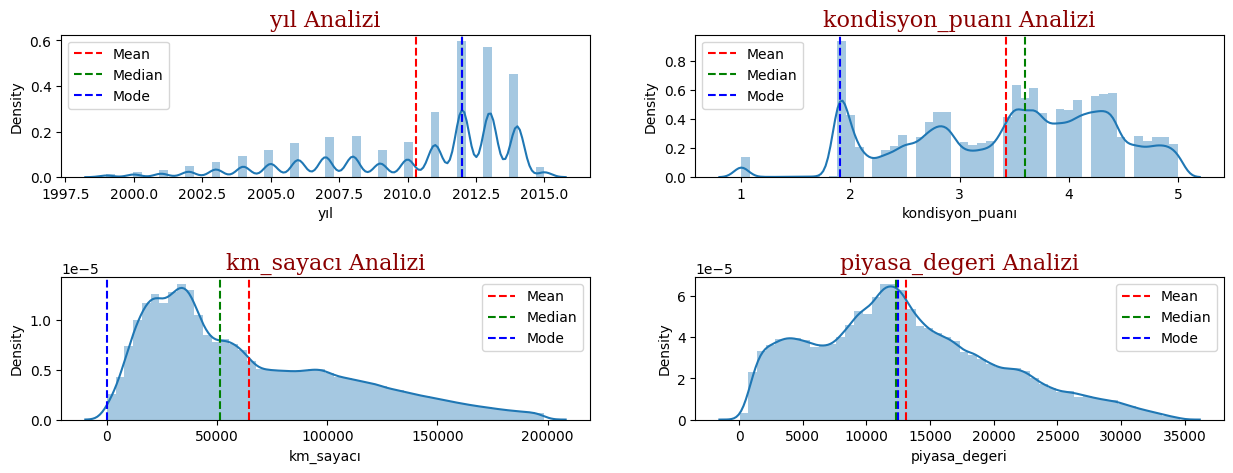

In [42]:
generate_distribution_plot(df, continuous_features)

**Yıl Analizi Grafigi**


Bu grafik yardımı ile  mavi "--" çizgi bizlere  en sık tekrar eden değerin 2012 model araçlar olduğunu göstermektedir. Kırmızı"--" çizgi ise ortalama değeri ile yaklaşık 2011 model araçların bulunduğunu gösteriyor.

**Kondsiyon Paunı Grafigi**
Bu grafik yardımı ile kırmızı "--" çizgi verinin aritmetik ortalamasıdır. Yani ortalama konsiyon puanı 3.5 civarında olan araçlar bulunmaktadır. Yeşil "-" çizgi medyan değeri, bizlere veri kümesi sıralandığında, medyan veri kümesinin tam ortasında yer alan değerdir. O değerde 3.7 gibi değere karşılık gelmektedir. Mavi "--" çizgi bizlere modu yani  bir veri kümesinde en yüksek frekansta görülen değeri temsil etmektedir. Yani en çok 1.9 konsiyona sahip araçlar bulunmaktadır.


**KM Sayacı Grafigi**
Bu grafik yardımı ile kırmızı "--" çizgi verinin aritmetik ortalamasıdır. Yani ortalama KM sayacı 50.000 ile 100.000 arasında  olan araçlar bulunmaktadır. Yeşil "-" çizgi medyan değeri, bizlere veri kümesi sıralandığında, medyan veri kümesinin tam ortasında yer alan değerdir. O değerde 50.000 km gibi değere karşılık gelmektedir. Mavi "--" çizgi bizlere modu yani  bir veri kümesinde en yüksek frekansta görülen değeri temsil etmektedir. Yani en çok 0-50.000 km arasında sahip araçlar bulunmaktadır.


**Piyasa Değer Grafigi**
Bu grafik yardımı ile kırmızı "--" çizgi verinin aritmetik ortalamasıdır. Yani ortalama satış fiyatı 10.000 ile 15.000 fiyat arasında  olan araçlar bulunmaktadır. Yeşil "-" çizgi medyan değeri, bizlere veri kümesi sıralandığında, medyan veri kümesinin tam ortasında yer alan değerdir. O değerde 10.000 ile 15.000 fiyat gibi değere karşılık gelmektedir. Mavi "--" çizgi bizlere modu yani  bir veri kümesinde en yüksek frekansta görülen değeri temsil etmektedir. Yani en çok 10.000 ile 15.000 fiyat arasında sahip araçlar bulunmaktadır.



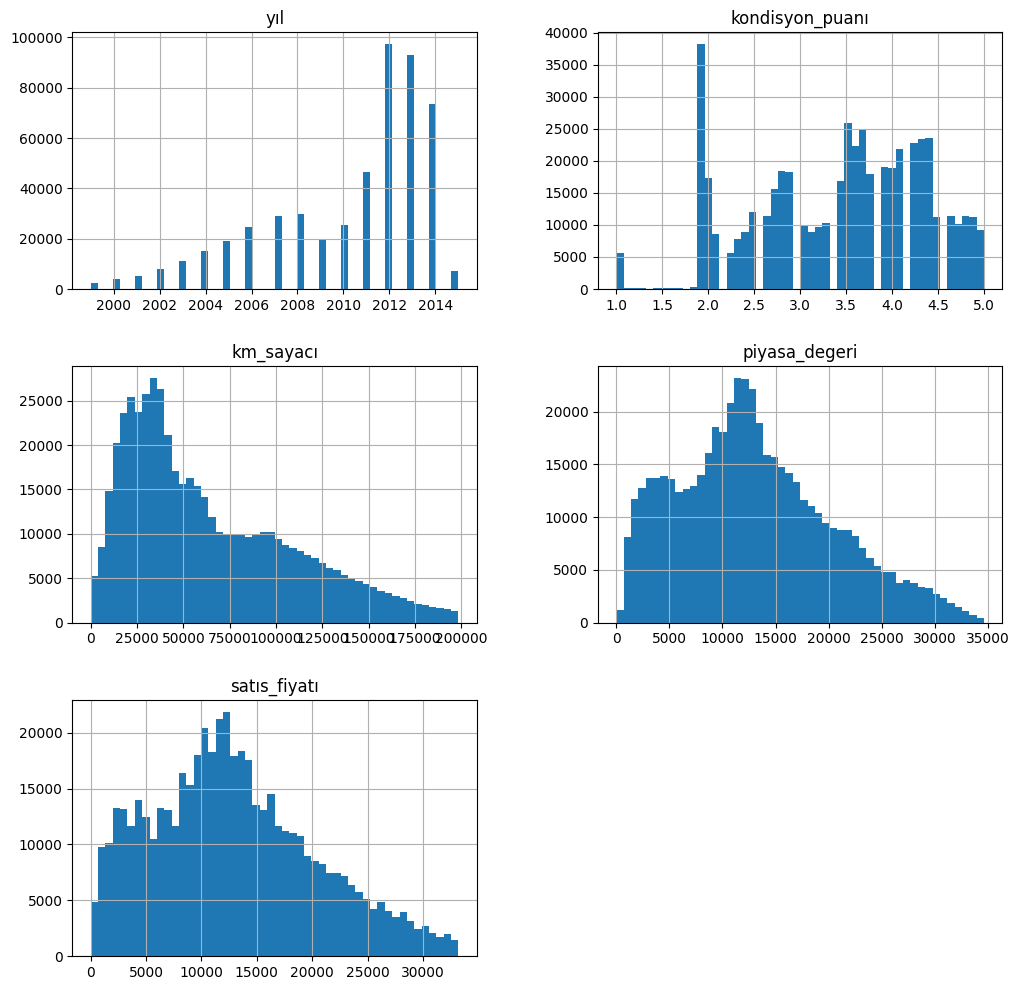

In [43]:
df.hist(bins=50, figsize=(12,12))
plt.show()

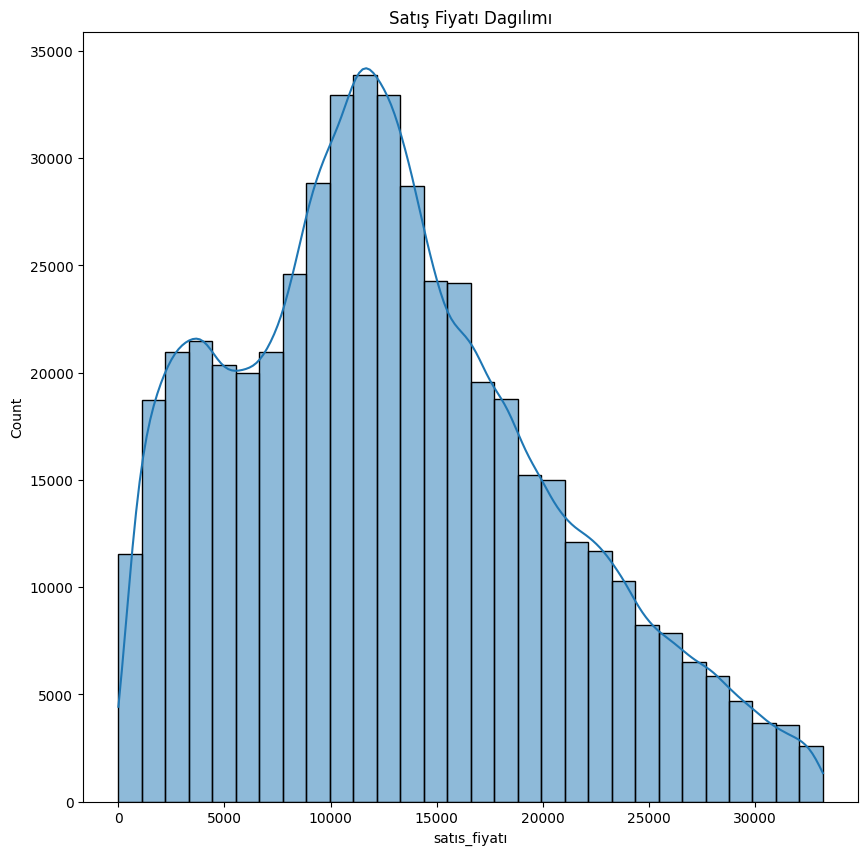

In [44]:
plt.figure(figsize=(10, 10))
sns.histplot(df['satıs_fiyatı'], kde=True, bins=30)
plt.title('Satış Fiyatı Dagılımı')
plt.show()

**2 - İkili Verilerin İncelenmesi**

In [45]:
"""
def plot_binary_categorical_pie_charts(df, binary_categorical_features):
    n = len(categorical_features)
    ncols = 2
    nrows = (n + 1) // 2  # Calculate rows needed
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
    fig.subplots_adjust(hspace=0.7)

    for ax, feature in zip(axes.flatten(), categorical_features):
        size_counts = df[feature].value_counts()
        ax.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(size_counts)))
        ax.set_title(f'{feature} Dağılımı')

    # Remove empty subplots if any
    for i in range(len(categorical_features), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

    plt.show()

# Example usage
plot_binary_categorical_pie_charts(df, binary_categorical_features)
"""

"\ndef plot_binary_categorical_pie_charts(df, binary_categorical_features):\n    n = len(categorical_features)\n    ncols = 2\n    nrows = (n + 1) // 2  # Calculate rows needed\n    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))\n    fig.subplots_adjust(hspace=0.7)\n\n    for ax, feature in zip(axes.flatten(), categorical_features):\n        size_counts = df[feature].value_counts()\n        ax.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(size_counts)))\n        ax.set_title(f'{feature} Dağılımı')\n\n    # Remove empty subplots if any\n    for i in range(len(categorical_features), len(axes.flatten())):\n        fig.delaxes(axes.flatten()[i])\n\n    plt.show()\n\n# Example usage\nplot_binary_categorical_pie_charts(df, binary_categorical_features)\n"

**3 - Kategorik Verilerin İncelenmesi**

In [46]:
categorical_features

['üretici',
 'modeli',
 'donanım_paketi',
 'arac_govdesi',
 'sanzıman',
 'arac_kimlik_numarası',
 'kayıt_eyalet',
 'dıs_renk',
 'ic_renk',
 'satıcı_adı',
 'satıs_tarihi']

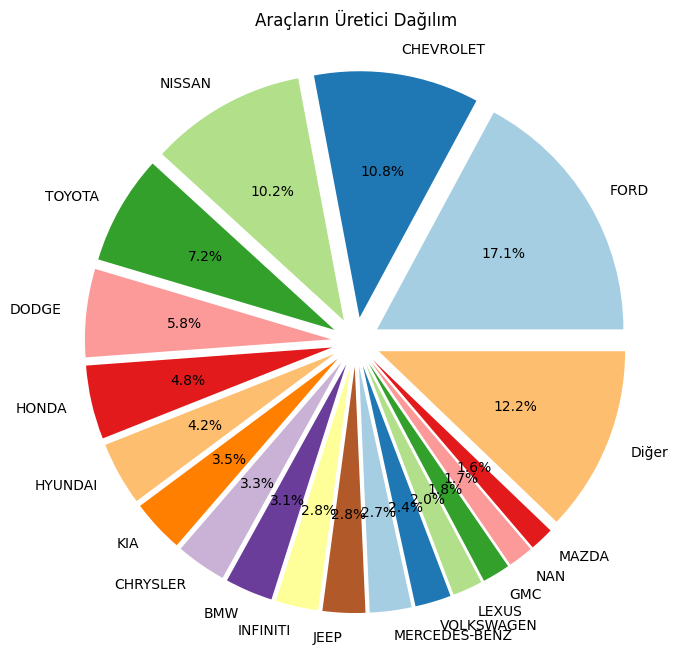

In [47]:
size_counts = df['üretici'].value_counts()
total = size_counts.sum()
threshold = 0.015 * total  # %1.5 eşik değeri

# Büyük dilimleri ve küçük dilimleri ayırma
large_sizes = size_counts[size_counts > threshold]
small_sizes = size_counts[size_counts <= threshold]

# Küçük dilimleri "Diğer" olarak birleştirme
sizes = pd.concat([large_sizes, pd.Series(small_sizes.sum(), index=['Diğer'])])
labels = large_sizes.index.tolist() + ['Diğer']

# Grafiği Oluşturma
plt.figure(figsize=(12, 8))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        colors=sns.color_palette('Paired', len(sizes)),
        labeldistance=1.1,
        pctdistance=0.6,
        explode=[0.1] * len(large_sizes) + [0.1])  # Dilimleri biraz dışarıya taşır

plt.title('Araçların Üretici Dağılım')
plt.show()

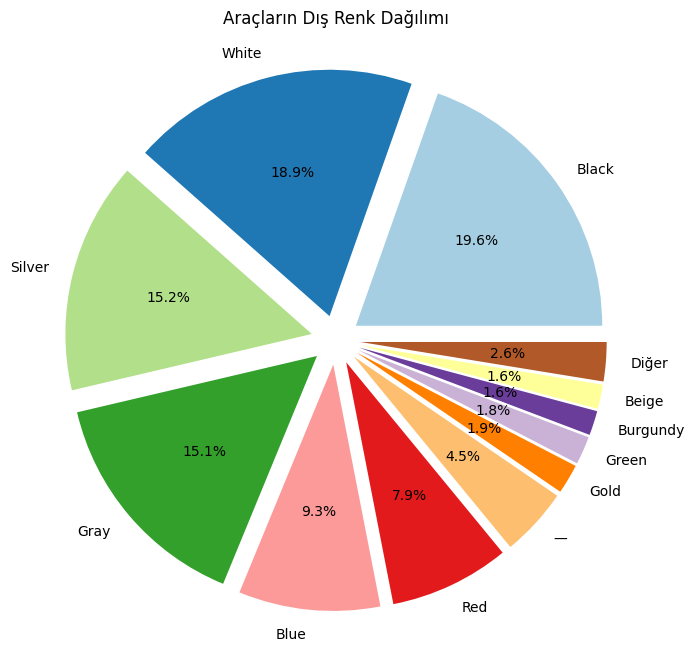

In [48]:
size_counts = df['dıs_renk'].value_counts()
total = size_counts.sum()
threshold = 0.015 * total  # %1.5 eşik değeri

# Büyük dilimleri ve küçük dilimleri ayırma
large_sizes = size_counts[size_counts > threshold]
small_sizes = size_counts[size_counts <= threshold]

# Küçük dilimleri "Diğer" olarak birleştirme
sizes = pd.concat([large_sizes, pd.Series(small_sizes.sum(), index=['Diğer'])])
labels = large_sizes.index.tolist() + ['Diğer']

# Grafiği Oluşturma
plt.figure(figsize=(12, 8))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        colors=sns.color_palette('Paired', len(sizes)),
        labeldistance=1.1,
        pctdistance=0.6,
        explode=[0.1] * len(large_sizes) + [0.1])  # Dilimleri biraz dışarıya taşır

plt.title('Araçların Dış Renk Dağılımı')
plt.show()

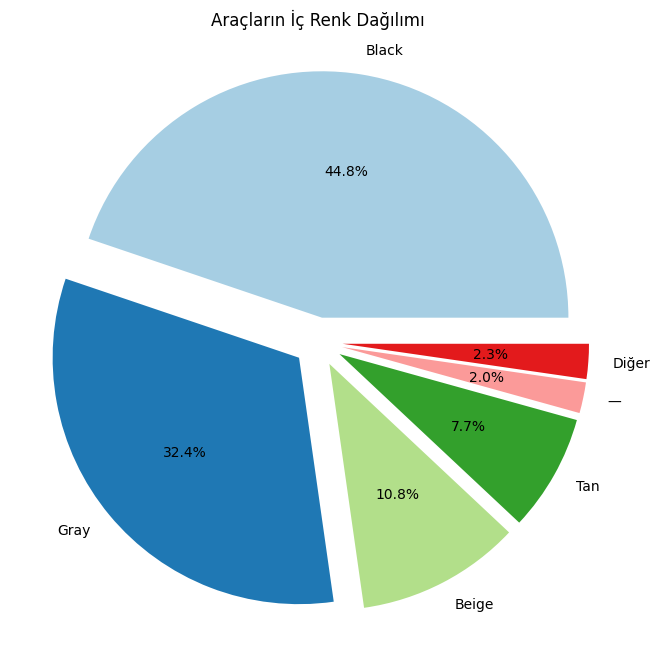

In [49]:
size_counts = df['ic_renk'].value_counts()
total = size_counts.sum()
threshold = 0.015 * total  # %1.5 eşik değeri

# Büyük dilimleri ve küçük dilimleri ayırma
large_sizes = size_counts[size_counts > threshold]
small_sizes = size_counts[size_counts <= threshold]

# Küçük dilimleri "Diğer" olarak birleştirme
sizes = pd.concat([large_sizes, pd.Series(small_sizes.sum(), index=['Diğer'])])
labels = large_sizes.index.tolist() + ['Diğer']

# Grafiği Oluşturma
plt.figure(figsize=(12, 8))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        colors=sns.color_palette('Paired', len(sizes)),
        labeldistance=1.1,
        pctdistance=0.6,
        explode=[0.1] * len(large_sizes) + [0.1])  # Dilimleri biraz dışarıya taşır

plt.title("Araçların İç Renk Dağılımı" )
plt.show()

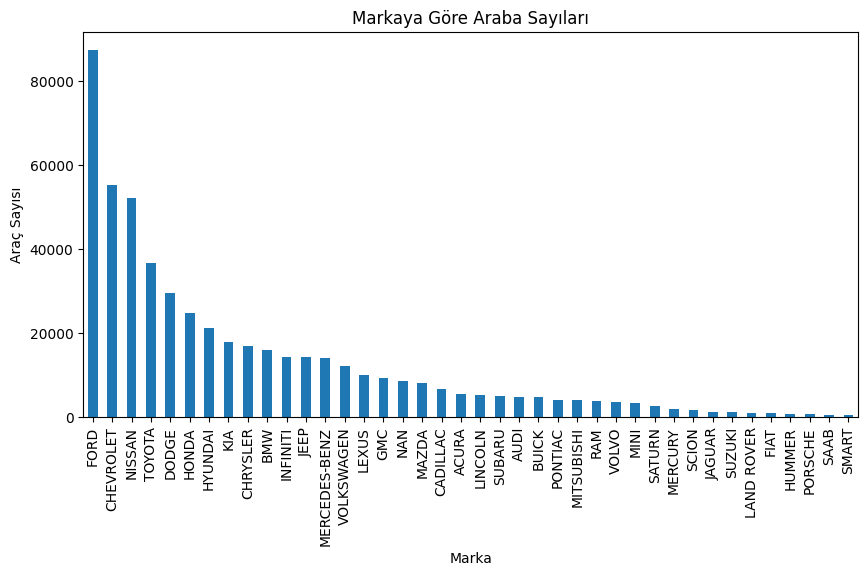

In [50]:
df.üretici.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Markaya Göre Araba Sayıları")
plt.ylabel('Araç Sayısı')
plt.xlabel('Marka');


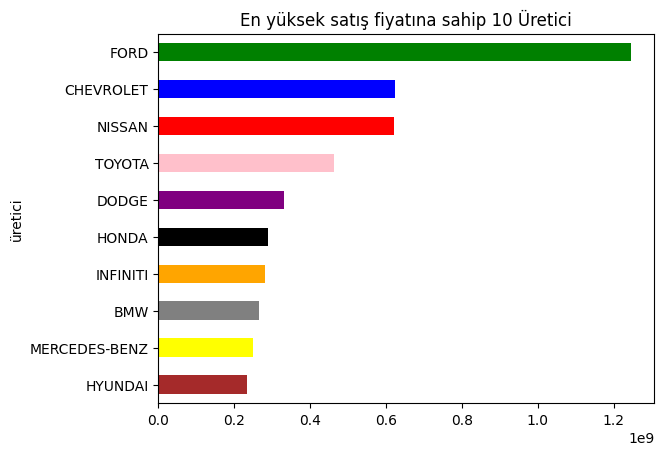

In [51]:
#  En yüksek satış fiyatına sahip 10 Üretici
colors = ["brown" ,'yellow','gray' , 'orange',
 'black', 'purple', 'pink', 'red','blue','green']
df.groupby('üretici')['satıs_fiyatı'].sum().sort_values(ascending=True).tail(10).plot.barh(color=colors);
plt.title("En yüksek satış fiyatına sahip 10 Üretici")
plt.show()

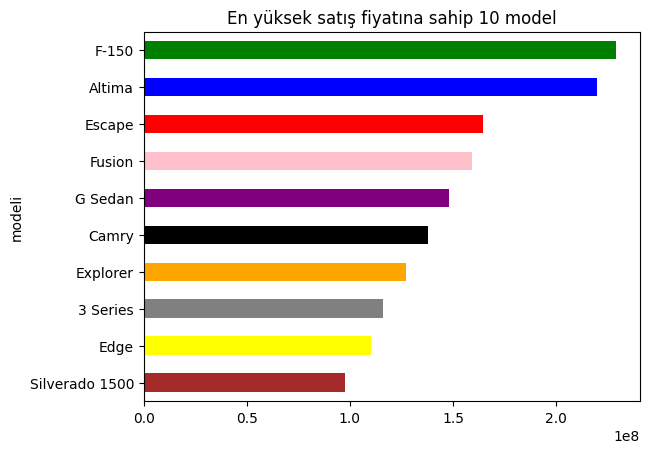

In [52]:
#  En yüksek satış fiyatına sahip 10 Modelin
colors = ["brown" ,'yellow','gray' , 'orange',
 'black', 'purple', 'pink', 'red','blue','green']
df.groupby('modeli')['satıs_fiyatı'].sum().sort_values(ascending=True).tail(10).plot.barh(color=colors);
plt.title("En yüksek satış fiyatına sahip 10 model")
plt.show()

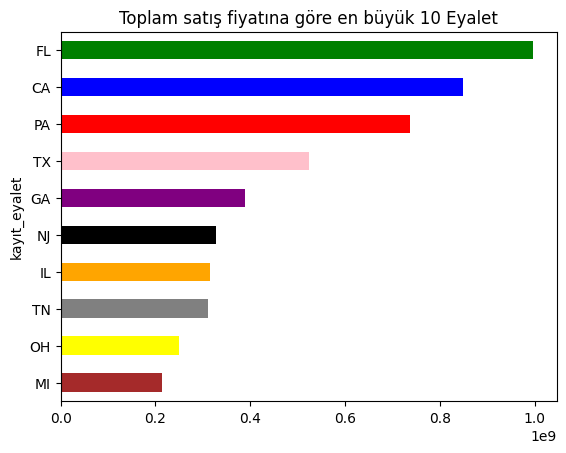

In [53]:
# Eyaletlere göre en çok satış gerçekleştirenler
colors = ["brown" ,'yellow','gray' , 'orange',
 'black', 'purple', 'pink', 'red','blue','green']
df.groupby('kayıt_eyalet')['satıs_fiyatı'].sum().sort_values(ascending=True).tail(10).plot.barh(color=colors);
plt.title("Toplam satış fiyatına göre en büyük 10 Eyalet")
plt.show()

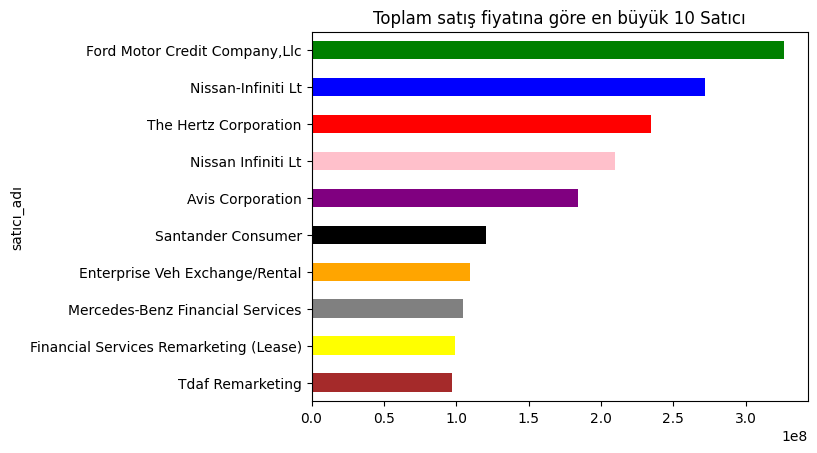

In [54]:
# Satıcılara göre en çok satış yapanlar
colors = ["brown" ,'yellow','gray' , 'orange',
 'black', 'purple', 'pink', 'red','blue','green']
df.groupby('satıcı_adı')['satıs_fiyatı'].sum().sort_values(ascending=True).tail(10).plot.barh(color=colors);
plt.title("Toplam satış fiyatına göre en büyük 10 Satıcı")
plt.show()

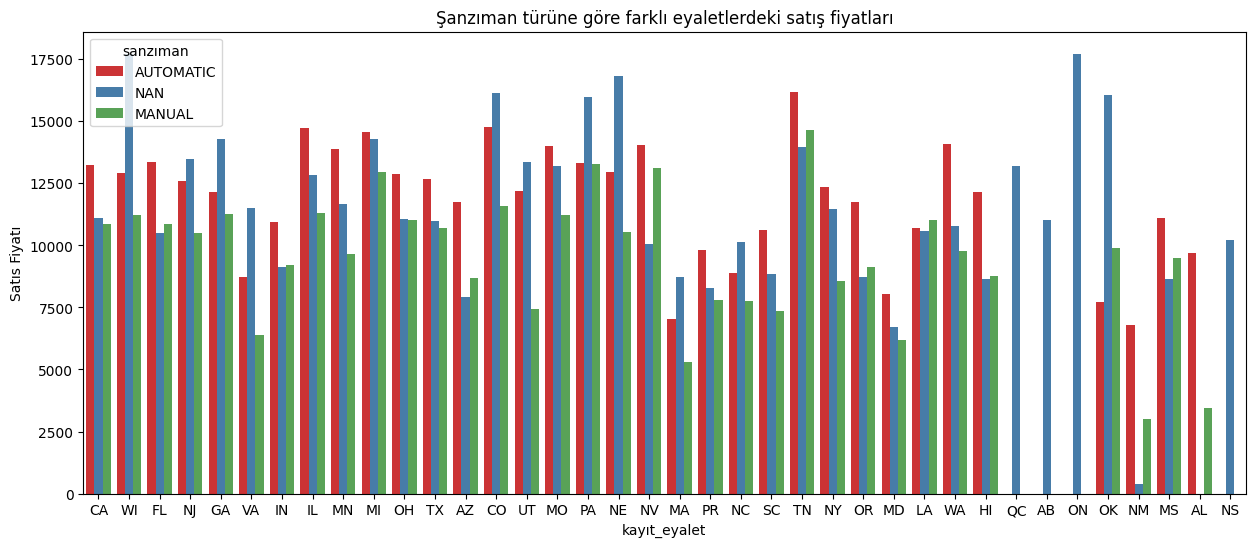

In [55]:
# Şanzıman türüne göre farklı eyaletlerdeki satış fiyatları

plt.figure(figsize=(15,6))
sns.barplot(x=df['kayıt_eyalet'], y=df['satıs_fiyatı'], hue=df['sanzıman'], ci=None, palette="Set1")
plt.title("Şanzıman türüne göre farklı eyaletlerdeki satış fiyatları")
plt.ylabel("Satıs Fiyatı")
plt.show()

# **Veri Ön İşleme**

In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510003 entries, 0 to 558810
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   yıl                   510003 non-null  int64  
 1   üretici               510003 non-null  object 
 2   modeli                510003 non-null  object 
 3   donanım_paketi        510003 non-null  object 
 4   arac_govdesi          510003 non-null  object 
 5   sanzıman              510003 non-null  object 
 6   arac_kimlik_numarası  510003 non-null  object 
 7   kayıt_eyalet          510003 non-null  object 
 8   kondisyon_puanı       510003 non-null  float64
 9   km_sayacı             510003 non-null  float64
 10  dıs_renk              510003 non-null  object 
 11  ic_renk               510003 non-null  object 
 12  satıcı_adı            510003 non-null  object 
 13  piyasa_degeri         510003 non-null  int64  
 14  satıs_fiyatı          510003 non-null  int64  
 15  satıs

In [57]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
objList = df_clean.select_dtypes(include = "object").columns

for obj in objList:
    df_clean[obj] = lb.fit_transform(df_clean[obj].astype(str))

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510003 entries, 0 to 558810
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   yıl                   510003 non-null  int64  
 1   üretici               510003 non-null  int64  
 2   modeli                510003 non-null  int64  
 3   donanım_paketi        510003 non-null  int64  
 4   arac_govdesi          510003 non-null  int64  
 5   sanzıman              510003 non-null  int64  
 6   arac_kimlik_numarası  510003 non-null  int64  
 7   kayıt_eyalet          510003 non-null  int64  
 8   kondisyon_puanı       510003 non-null  float64
 9   km_sayacı             510003 non-null  float64
 10  dıs_renk              510003 non-null  int64  
 11  ic_renk               510003 non-null  int64  
 12  satıcı_adı            510003 non-null  int64  
 13  piyasa_degeri         510003 non-null  int64  
 14  satıs_fiyatı          510003 non-null  int64  
 15  satıs

In [59]:
df_clean = df_clean.astype(float)

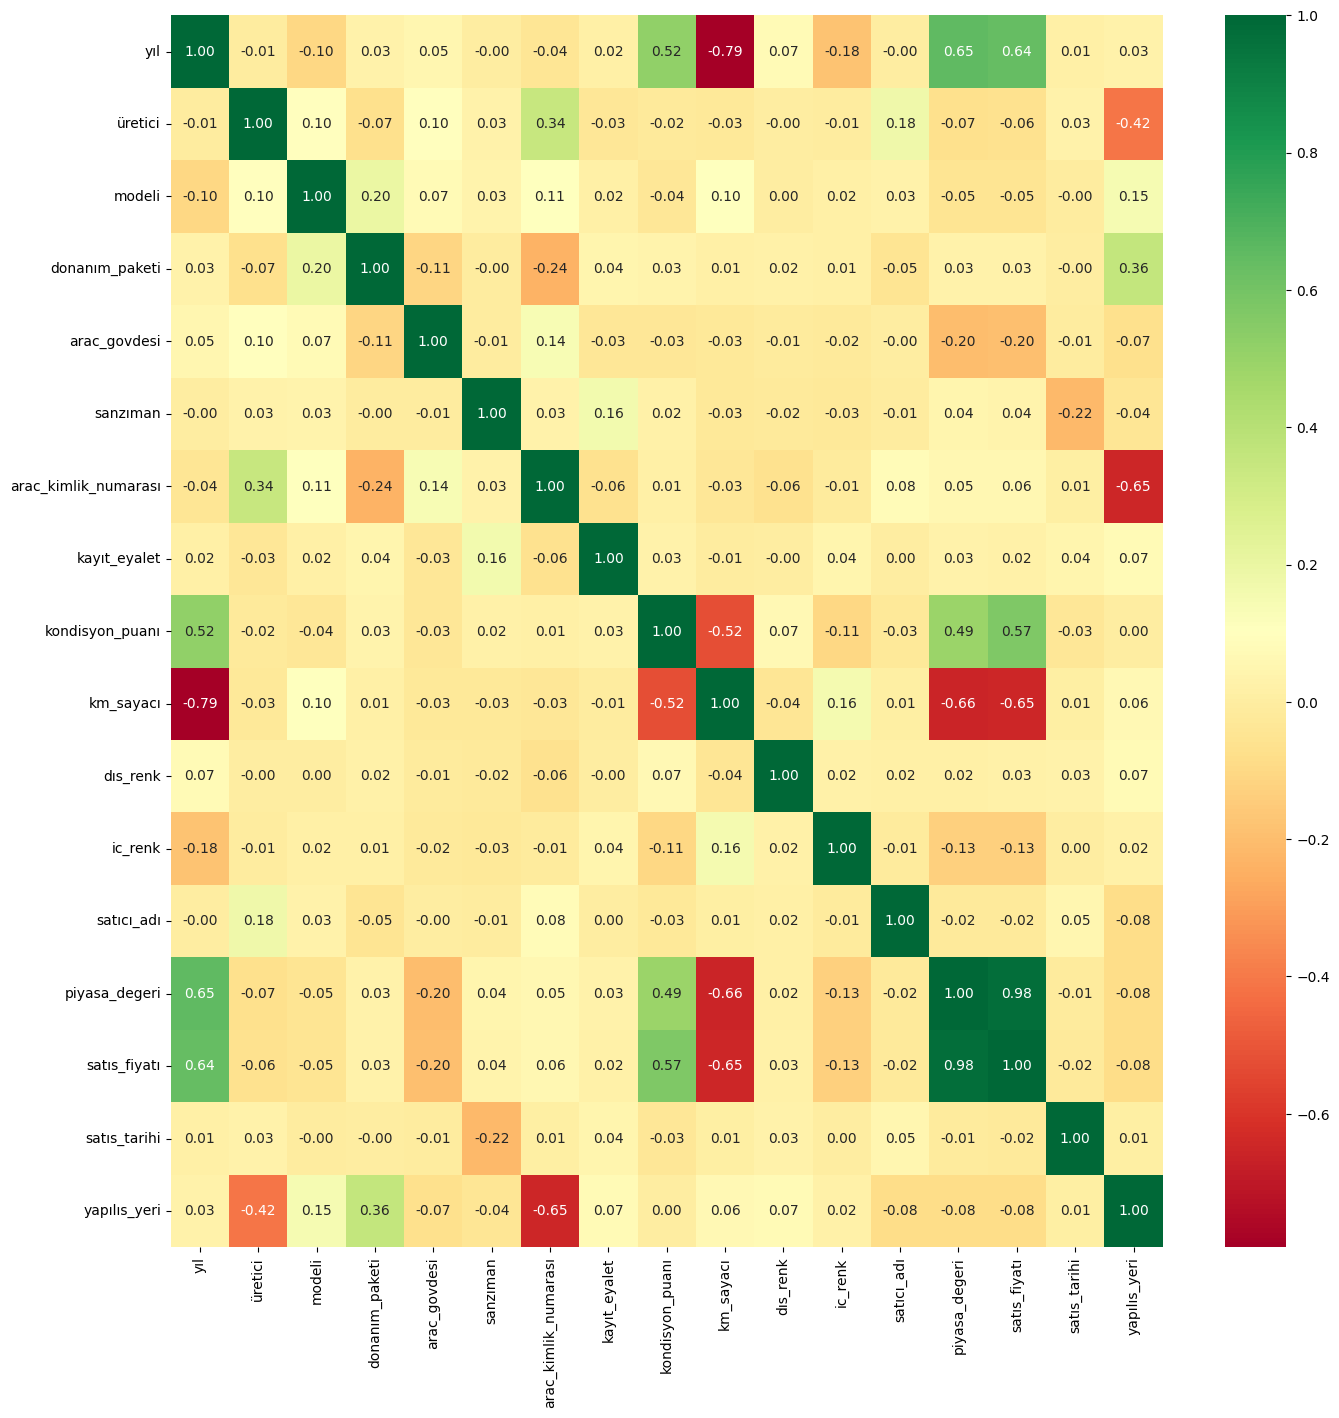

In [60]:
df_clean_corr = df_clean.corr()
f, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(df_clean_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 10}, ax=ax)
plt.show()

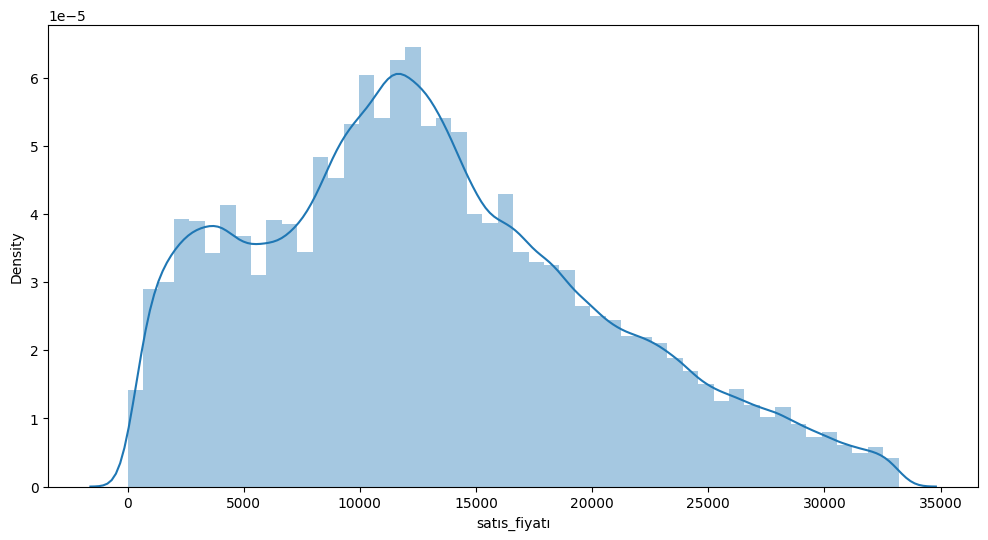

In [61]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(df.get("satıs_fiyatı"), kde=True)

plt.show()

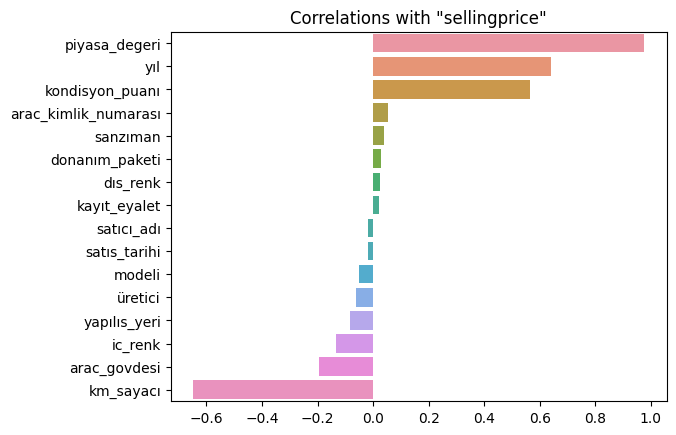

In [62]:
# Correlations

limit = -1.0

data = df_clean.corr()["satıs_fiyatı"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "sellingprice"')
plt.show()

**Korelasyon analizi**, veri setinde hangi özelliklerin hedef değişkenle güçlü ilişkide olduğunu belirlemek için kullanılır. Özellikle yüksek pozitif veya negatif korelasyon gösteren özellikler, modelin tahmin gücüne katkıda bulunabilir.

**Yüksek Korelasyonlu Özellikleri Tutma:**

Hedef değişkenle güçlü korelasyona sahip olan özellikler (sellingprice ile yüksek pozitif/negatif korelasyona sahip) modelin performansını artırır.

**Düşük Korelasyonlu Özellikleri Çıkartma:**

Hedef değişkenle çok düşük korelasyonlu veya bağımsız gibi görünen özellikler, modelin gereksiz yere karmaşık hale gelmesine yol açabilir.

**Özellik Seçimi için Limit Değeri Ayarlama:**

limit değişkenini belirleyerek hangi korelasyon değeri altında kalan özellikleri çıkarmak istediğini tanımlayabilirsin. Örneğin, limit=0.1 yaparak hedef değişkenle korelasyonu 0.1’den düşük olanları çıkartabilirsin.

Azaltılmış veri seti şekli: (510003, 10)


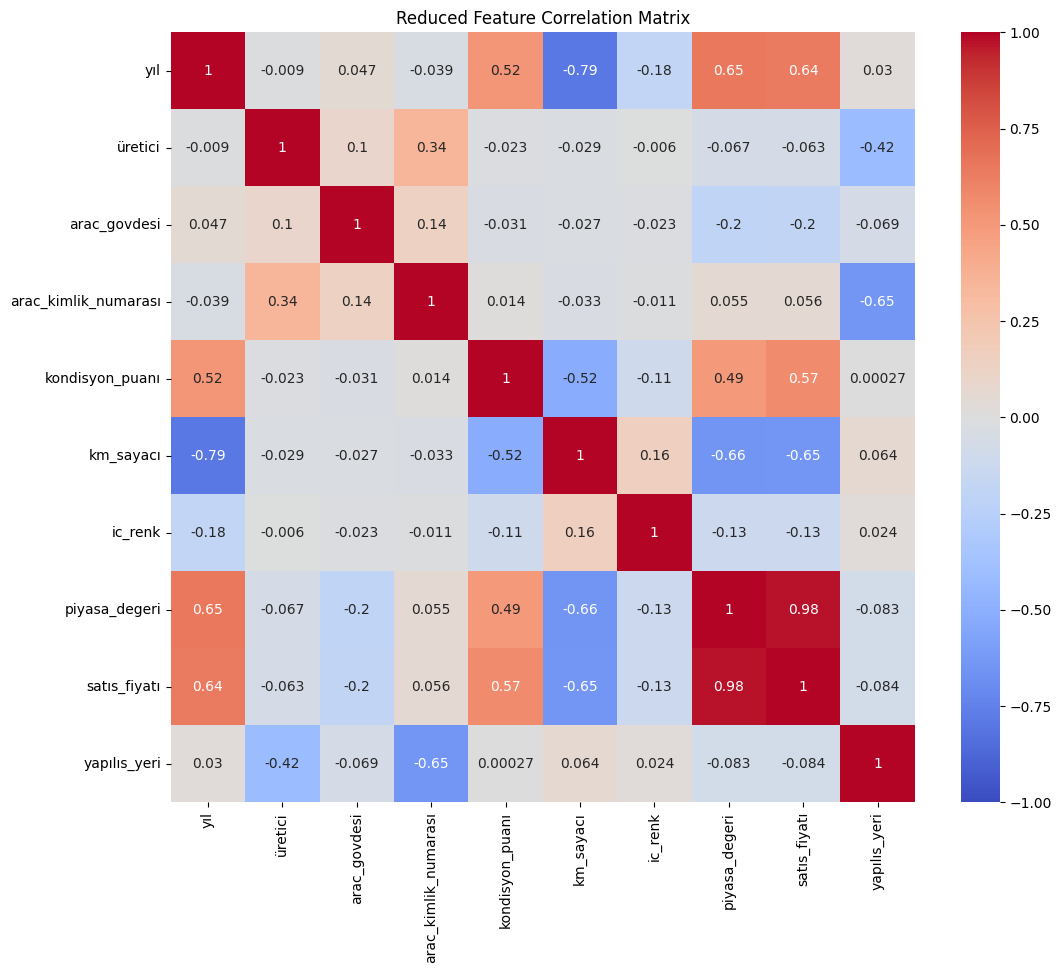

In [63]:
corr_matrix = df_clean.corr()

# Belirli bir eşik değeri (örneğin 0.1) altında olan korelasyonları filtreleme
threshold = 0.05
low_corr_columns = []

# Korelasyonu düşük olan sütunları bulma
for column in corr_matrix.columns:
    if abs(corr_matrix["satıs_fiyatı"][column]) < threshold and column != "satıs_fiyatı":
        low_corr_columns.append(column)

# Düşük korelasyonlu sütunları veri setinden çıkarma
df_clean = df_clean.drop(columns=low_corr_columns)

# Yeni veri setinin boyutlarını kontrol et
print("Azaltılmış veri seti şekli:", df_clean.shape)

# Korelasyon matrisi görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Reduced Feature Correlation Matrix')
plt.show()

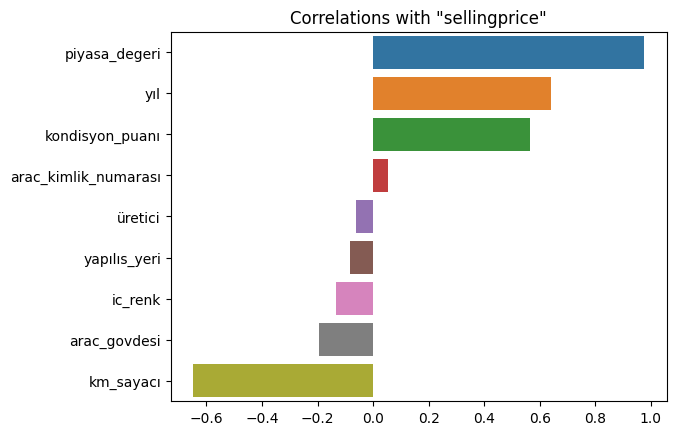

In [64]:
# Correlations

limit = -1.0

data = df_clean.corr()["satıs_fiyatı"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "sellingprice"')
plt.show()

In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510003 entries, 0 to 558810
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   yıl                   510003 non-null  float64
 1   üretici               510003 non-null  float64
 2   arac_govdesi          510003 non-null  float64
 3   arac_kimlik_numarası  510003 non-null  float64
 4   kondisyon_puanı       510003 non-null  float64
 5   km_sayacı             510003 non-null  float64
 6   ic_renk               510003 non-null  float64
 7   piyasa_degeri         510003 non-null  float64
 8   satıs_fiyatı          510003 non-null  float64
 9   yapılıs_yeri          510003 non-null  float64
dtypes: float64(10)
memory usage: 42.8 MB


In [66]:
df_clean_sample = df_clean.sample(n=50000, random_state=1)

In [67]:
df_clean_sample= df_clean_sample.astype(float)

In [68]:
df_clean_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 91972 to 384958
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yıl                   50000 non-null  float64
 1   üretici               50000 non-null  float64
 2   arac_govdesi          50000 non-null  float64
 3   arac_kimlik_numarası  50000 non-null  float64
 4   kondisyon_puanı       50000 non-null  float64
 5   km_sayacı             50000 non-null  float64
 6   ic_renk               50000 non-null  float64
 7   piyasa_degeri         50000 non-null  float64
 8   satıs_fiyatı          50000 non-null  float64
 9   yapılıs_yeri          50000 non-null  float64
dtypes: float64(10)
memory usage: 4.2 MB


 ### **GÖZETİMLİ ÖĞRENME**

## **Train ve Test Verilerinin Oluşturulması**

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df_clean_sample["satıs_fiyatı"] # bağımlı degisken "math_score" sütununu alır
x = df_clean_sample.drop("satıs_fiyatı", axis=1) # bağımsız değişkenler "math_score" sütunu hariç hepsi olur

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state = 35)

# **Train ve Test Verilerinin Scale Edilmesi**

In [70]:
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

Model Seçimi İçin Gerekli Regresyon

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000, 9), (15000, 9), (35000,), (15000,))

# **MODEL SEÇİMİ İÇİN GEREKLİ REGRESYON ALGORİTMALARIN İÇE AKTARILMASI**

In [72]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score,mean_squared_error

In [73]:
regressors = {
              "Linear Regression": LinearRegression(),
              "Ridge Regression": Ridge(),
              "Lasso Regression": Lasso(),
              "Elastic Net Regression": ElasticNet(),
              "Random Forest Regression": RandomForestRegressor(),
              "DecisionTreeRegressor":DecisionTreeRegressor()

              }

# **CROSS VALIDATION İLE MODEL TRAIN'İ VE BAŞARI METRİKLERİNİN ÖLÇÜMÜ**

In [74]:

for name, regressor in regressors.items():

    regressor.fit(x_train, y_train)

    # test setleri üzerinde tahminler yaptır
    y_test_p = regressor.predict(x_test)

    # test setleri için R-kare puanlarını hesaplar
    # r kare asağıda daha detaylı anlatılmıştır
    test_r2 = r2_score(y_test, y_test_p)

    print(f"Model: {name.upper()}")
    print(f"Test R-Squared Score: {test_r2:.5f}\n")

    print(name.upper())
    scores = cross_validate(regressor, x_train, y_train,
                            scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_mean_absolute_percentage_error'],
                            cv = 10, return_train_score = False)  # burada return_train_score False olarak ayarlanıyor
                                                                  # böylece eğitim seti üzerindeki skorlar dönmeyecek ve bu skorlar çıktıda görünmeyecektir.
    scores = pd.DataFrame(scores, index = range(1,11))

    print(scores.iloc[:, 2:].mean().abs().apply("{:.5f}".format))

    print("\n############################################################################\n")


Model: LINEAR REGRESSION
Test R-Squared Score: 0.96558

LINEAR REGRESSION
test_r2                                          0.96292
test_neg_mean_absolute_error                   945.70034
test_neg_mean_squared_error                2035801.83809
test_neg_mean_absolute_percentage_error          0.13782
dtype: object

############################################################################

Model: RIDGE REGRESSION
Test R-Squared Score: 0.96558

RIDGE REGRESSION
test_r2                                          0.96292
test_neg_mean_absolute_error                   945.69578
test_neg_mean_squared_error                2035801.81423
test_neg_mean_absolute_percentage_error          0.13782
dtype: object

############################################################################

Model: LASSO REGRESSION
Test R-Squared Score: 0.96558

LASSO REGRESSION
test_r2                                          0.96292
test_neg_mean_absolute_error                   945.54401
test_neg_mean_squared_erro

**1. R-kare (R²)**
Açıklama: R-kare, modelinizin veri setindeki değişkenliği ne kadar açıkladığını gösterir. 1.0 değeri mükemmel uyumu, 0.0 değeri ise hiçbir uyumu ifade etmez. Genellikle regresyon modellerinin performansını değerlendirmek için kullanılır.

**2. Negatif Ortalama Mutlak Hata (NegMAE)**
Açıklama: Ortalama mutlak hata (MAE), modelin tahminleri ile gerçek değerler arasındaki ortalama mutlak farkı gösterir. Negatif olarak hesaplanır çünkü model optimizasyonunda hedef, hatayı minimize etmek olduğundan, negatif MAE, daha küçük değerlerin daha iyi performansı gösterdiğini ifade eder.

**3. Negatif Ortalama Kare Hata (NegMSE)**
Açıklama: Ortalama kare hata (MSE), modelin tahminleri ile gerçek değerler arasındaki ortalama kare farkı gösterir. MSE, büyük hataları daha fazla vurgular ve modelin genel performansını değerlendirmede yaygın olarak kullanılır. Negatif olarak hesaplanır çünkü optimizasyon amacıyla hata değerlerinin küçültülmesi istenir.

**4. Negatif Ortalama Mutlak Yüzde Hata (NegMAPE)**
Açıklama: Ortalama mutlak yüzde hata (MAPE), modelin tahminlerinin gerçek değerlerle ne kadar uyumlu olduğunu yüzdelik olarak gösterir. Negatif olarak hesaplanır çünkü hedef, yüzde hata oranını minimize etmektir. Daha düşük değerler daha iyi performansı ifade eder.



# **MODEL SEÇİMİ**



Yukarıda yapılan cross validationdan sonuc olarak en iyi performansı gösteren model, **RANDOM FOREST REGRESSION** olarak belirlenmiştir. Bu yüzden aşağıda Ridge Regresyonun hiper parametre optimizasyonu yapulmıştır.

 # **HİPERPARAMETRE OPTİMİZASYONU**

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

# Hiperparametreler için bir ızgara tanımlama
param_grid = {
    'n_estimators': [100, 120],
    'max_depth': [ 10, 15],
}

# Grid Search ile hiperparametre optimizasyonu
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# En iyi parametreleri ve sonuçları yazdırma
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=10, n_estimators=100; total time=  34.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=  31.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=  34.6s
[CV] END .....................max_depth=10, n_estimators=120; total time=  37.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=  34.8s
[CV] END .....................max_depth=10, n_estimators=120; total time=  38.7s
[CV] END .....................max_depth=10, n_estimators=100; total time=  35.3s
[CV] END .....................max_depth=10, n_estimators=120; total time=  38.7s
En iyi parametreler: {'max_depth': 10, 'n_estimators': 100}
En iyi skor: 0.05128571428571428


 # **MODEL DEĞERLENDİRME**

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# en iyi parametrelerle eğitilmiş modeli kullanarak test verisini tahmin etme
y_pred = grid_search.best_estimator_.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

 # **MSE VE MAE NEDİR?**



In [77]:
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)

Mean Squared Error (MSE):  2607968.682066667
Mean Absolute Error (MAE):  1083.9495333333334


**MEAN SQUARED ERROR (MSE):**
Gerçek ve tahmin değerler arasındaki sapmayı ölçer ve bu sapmanın karesini alır. Daha sonra bu karelerin ortalamasını hesaplar. Bu, regresyon modelinin ne kadar iyi veya kötü performans gösterdiğini değerlendirmek için kullanılır. Düşük bir ortalama kare hatası, modelin daha iyi performans gösterdiğini gösterirken, yüksek bir değer modelin kötü performans gösterdiğini gösterebilir.

**MEAN ABSOLUTE ERROR (MAE):**
Gerçek değerler ile tahmin edilen değerler arasındaki mutlak farkları alrı ve bu farkların ortalamasını hesaplar. Bu, regresyon modelinin ne kadar iyi veya kötü performans gösterdiğini değerlendirmek için kullanılır. Düşük bir mutlak hata, modelin daha iyi performans gösterdiğini gösterirken, yüksek bir değer modelin kötü performans gösterdiğini gösterebilir.

# GÖZETİMSİZ ÖĞRENME

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

**1 - Hedef Değişkeni Belirleme**

1- İlk olarak hedef değişkeni veri setinden çıkarmadan önce Hedef değişken farklı sayılardan oluştuğu için sayı değerlerini belli bir aralıkla objcet dönüştürme sonra tekrardan label encoding ile sayısal değere dönüşüm yapacagız.

In [79]:
#df_clean_un = df_clean.drop(columns=['satıs_fiyatı'])
unique_values = df_clean_sample["satıs_fiyatı"].unique()
print(unique_values)

[ 1900. 15100. 23000. 13500. 12300.  6100. 22600. 14800. 10600. 12200.
 22500.  7700. 18200. 12000. 12500.  2600. 10900.  1300. 30500. 10300.
 12100. 21000. 19400. 11800. 13000.  2400. 14300.  8435.  7300. 17100.
  5400.  1700.   600. 19100. 27700. 26000. 18600.  3700. 13200. 26700.
 18100. 17300.   500. 16200.   800.  5300.  3900.  8900.  4700. 24200.
 31500.  6000. 21500. 16400. 16100. 10200. 12800.  1500.  9000. 13600.
 10400.  8100. 31000. 15400. 25200. 11700. 14500.  7750. 11000.  4200.
 14000. 14600. 15900. 20600. 22900. 11300.  5000. 22400. 19500.  9600.
 11100.  2800. 10700. 17800. 14484. 21100. 10500.  8700.  4300. 19250.
  8800.  4900. 11500. 19600.  1000.  4600. 30000. 12900. 11600. 23200.
 26100. 20750.  3600. 27000. 16900. 11200. 12700. 25750. 21400. 14900.
 19000.  2900. 31600. 16700.  9100.  4400.  4100.  7000.  8200. 22700.
 23600. 12250. 16300.   200.  3300. 20000. 23800.  7400. 17700.  9500.
  3800. 15000. 21300. 20300. 19300. 13700. 17000. 14200. 18900.   900.
 16600

In [80]:
df_clean_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 91972 to 384958
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yıl                   50000 non-null  float64
 1   üretici               50000 non-null  float64
 2   arac_govdesi          50000 non-null  float64
 3   arac_kimlik_numarası  50000 non-null  float64
 4   kondisyon_puanı       50000 non-null  float64
 5   km_sayacı             50000 non-null  float64
 6   ic_renk               50000 non-null  float64
 7   piyasa_degeri         50000 non-null  float64
 8   satıs_fiyatı          50000 non-null  float64
 9   yapılıs_yeri          50000 non-null  float64
dtypes: float64(10)
memory usage: 4.2 MB


2 - Bu sayısal değerleri belli bir aralık ile temisl etmesi için object dönüşüm.

In [81]:

bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000+']

# Verileri aralıklara ayırın
df_clean_sample["satıs_fiyatı"] = pd.cut(df_clean_sample["satıs_fiyatı"], bins=bins, labels=labels, right=False)

# Sonuçları yazdırın
print(df_clean_sample["satıs_fiyatı"].value_counts())

satıs_fiyatı
10000-15000    13800
5000-10000     10351
15000-20000     8702
0-5000          7999
20000-25000     5258
25000-30000     2877
30000+          1013
Name: count, dtype: int64


3 - Objcet veriyi encoing ile sayısal veriye dönüştürme

In [82]:
label_encoder = LabelEncoder()
df_clean_sample['satıs_fiyatı'] = label_encoder.fit_transform(df_clean_sample['satıs_fiyatı'])
print(df_clean_sample["satıs_fiyatı"].value_counts())

satıs_fiyatı
1    13800
6    10351
2     8702
0     7999
3     5258
4     2877
5     1013
Name: count, dtype: int64


**2 - Hedef Değişkeni Çıkarma**

In [83]:
# 'Fiyat' sütununu hedef değişken olarak çıkarıyoruz
X = df_clean_sample.drop(columns=['satıs_fiyatı'])  # X, hedef değişken hariç tüm özellikleri içerir
y = df_clean_sample['satıs_fiyatı']  # y, hedef değişkendir

**3 -  Gözetimsiz Öğrenme Veri Hazırlığı**

Hedef değişkeni çıkardıktan sonra, verinizi gözetimsiz öğrenme yöntemleri için hazırlamanız gerekir. Örneğin:

**Kümeleme (Clustering):** Kümelere ayırmak için verinizi kullanabilirsiniz.

**Boyut İndirgeme (Dimensionality Reduction):** PCA veya t-SNE gibi yöntemlerle veri boyutunu düşürebilirsiniz.

**NOT:** Kümeleme algoritması için tüm değerlerin non-null olması ve string barındırmaması önemlidir. Bir analitik uzayda uzaklık hesabına göre kümeleme yapılacağı için tüm değerlerimiz sayısal olmalıdır.

**K-ortalama kümeleme** ya da **K-means kümeleme (K-means clustering)** yöntemi bir veri kümesini giriş parametresi olarak verilen K adet kümeye bölümlemektir. Amaç, gerçekleştirilen bölümleme işlemi sonunda elde edilen kümelerin, küme içi benzerliklerinin maksimum ve kümeler arası benzerliklerinin ise minimum olmasını sağlamaktır.

Algoritma temel olarak 4 aşamadan oluşur:

**1.Küme merkezlerinin belirlenmesi**

**2.Merkez dışındaki verilerin mesafelerine göre kümelendirilmesi**

**3.Yapılan kümelendirmeye göre yeni merkezlerin belirlenmesi (veya eski merkezlerin yeni merkeze kaydırılması)**

**4.Kararlı hale (stable state) gelinene kadar 2. ve 3. adımların tekrarlanması.**

## Centroid & Inertia Kavramları

K-Means kümeleme algoritmasının amacı, basitçe k adet kümenin ağırlık merkezlerini olabilecek en iyi şekilde seçmektir. Bu ağırlık merkezlerine centroid adı verilir. Olabilecek en iyi şekilde seçildiğinde, kayıp fonksiyonu(yani inertia değeri) minimize edilmiş olur.

Not: Pek tabii ki, nihai amacımız sadece inertia’yı olabildiği kadar küçültmek değildir. Cluster veya centroid sayısını veri kümesinin eleman sayısına eşit belirlersek doğal olarak inertia sıfır olacaktır. Ama sonucunda verimiz kümelenmemiş olur.

İdeal küme sayısının kaç olabileceği, dirsek metodu ile bulunur.

In [84]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

Satıs Fiyatı özelliği veri kümemizdeki örneklerin arasından çıkarmıştık. ardından değerleri bir **X** değişkenine atadık ve skaler büyüklüklerin etkisini gidermek için **scale** ederek algoritmamızın veriyi anlamak için kullanacağı girdi setimizi hazırlamış olduk.

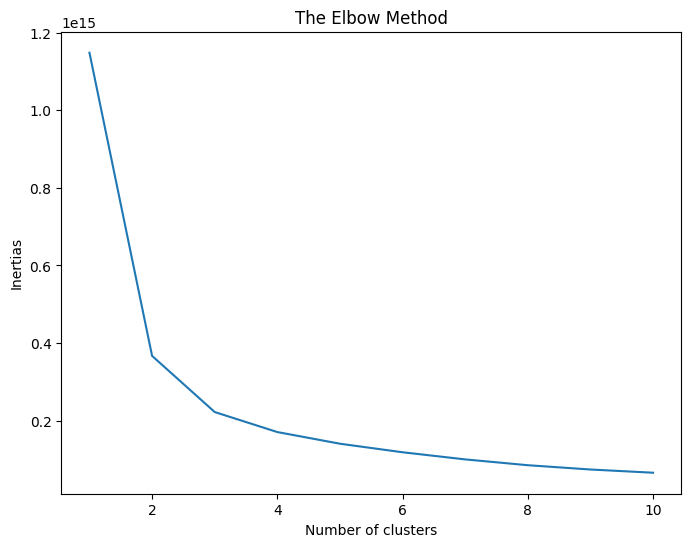

In [85]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

***Not:*** Optimum küme sayısını belirlerken, X değerlerinin **scale** edilmiş halini kullanmadık çünkü bu metod, model başarımını artırmak için yapacak olduğumuz sayısal bir düzeltmedir. Ancak öncesinde, bu veriyi kaç kümeye ayıracağımızı bilmek için, verinin kendisini incelemek isteriz, üzerinde oynama yapılmış halini değil.

Küme sayımızı **4** olarak belirleyebiliriz gibi duruyor, devamında **inertia** değerinin düşme hızı azalıyor.

In [86]:
model = KMeans(n_clusters=4)
training_points = scaled_x[:30000]
test_points = scaled_x[30000:]
model.fit(training_points)
labels = model.predict(test_points)

K-Means modelimiz, hazırlamış olduğumuz veri setinin ilk 1000 örneğini eğitim için kullanacak, diğer 500 örneği de ilk 1000 örnekten yaptığı çıkarımlara göre sınıflandıracak.

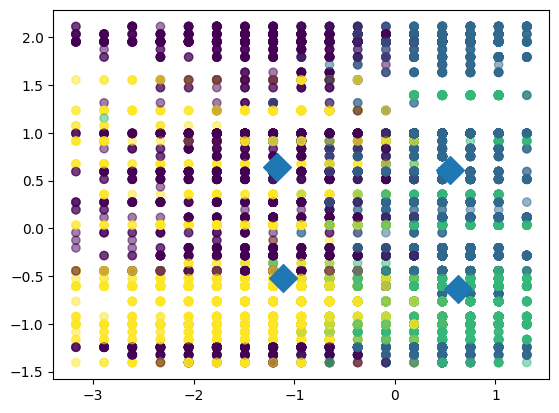

In [87]:
xs = test_points[:,0]
ys = test_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

Kümelerin ağırlık merkezlerini grafikte kare olarak görebilirsiniz. Bazı keskin örnekleri düzgün kümeleyebilmiş olsak da, renkler biraz karışık duruyor. Daha iyi performans için algoritmamıza nasıl yardımcı olabiliriz?

## Boyut Azaltma & PCA

Boyut azaltma, verilerdeki kalıpları bulur ve bunları "sıkıştırılmış" bir biçimde yeniden ifade eder. Böylece, süre ve boyut açısından daha efektif hesaplama yapabilir. Çok daha büyük veri kümelerinde çalışıldığında sadece doğruluk değil, süre açısından da önemlidir.

En önemli işlevi ise, görece az bilgi içeren özelliklerin veri kümesinden atılmasıdır. Boyut azaltma işlevinde kullanılan en temel teknik, PCA(Principal Component Analysis - Temel Bileşen Analizi)'dir.

Yapmaya çalışacağımız temel şey, ver için önemli bilgileri içeren "temel bileşen" sayısını bulmak ve veri setindeki özellikleri bu sayıya indirmektir.


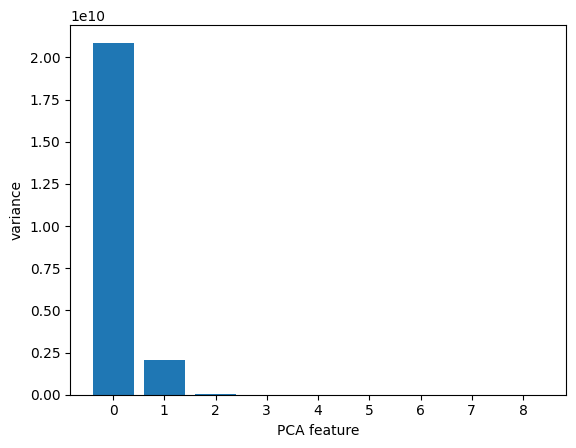

In [88]:
pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Bileşen sayımızı 2 olarak belirlediğimizde, toplam varyansın yaklaşık %99.8'ini, yani neredeyse tamamını koruyabiliyoruz.

In [89]:
pca = PCA(n_components=2)
pca.fit(scaled_x)
pca_features = pca.transform(scaled_x)

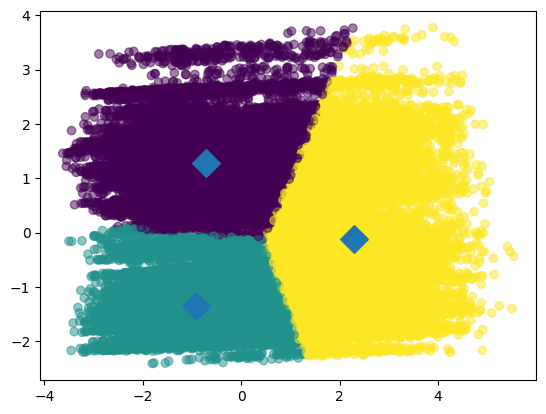

In [90]:
model = KMeans(n_clusters=3)
training_points = pca_features[:1000]
test_points = pca_features[1000:]
model.fit(training_points)
labels = model.predict(test_points)
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

Hem ağırlık merkezleri, hem de kümeler kesinlikle ilk denememizde olduğundan daha iyi görünüyor.